In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import pickle

In [2]:
df = pd.read_csv('home_loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [7]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

In [8]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')
df['Credit_History'] = df['Credit_History'].astype('int')

In [9]:
var_cat = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed',  'Credit_History', 'Property_Area', 'Loan_Status']
var_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

In [10]:
df['Loan_Status'].value_counts(normalize=True) * 100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


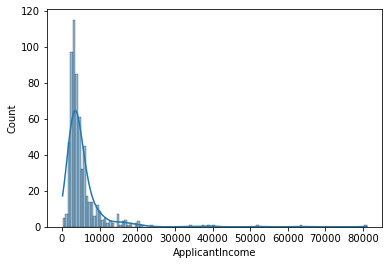

In [12]:
sns.histplot(df['ApplicantIncome'], kde=True)
plt.show()

<AxesSubplot:>

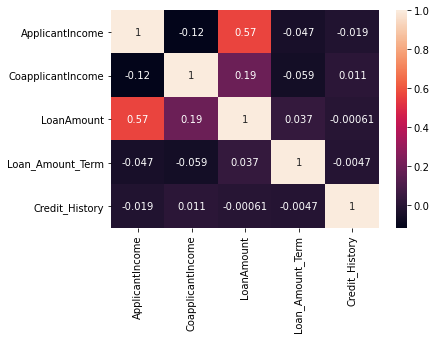

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True, columns=var_cat)
df_encoded

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,128.0,360,1,0,0,0,0,0,0,1,0,1,1
1,LP001003,4583,1508.0,128.0,360,1,1,1,0,0,0,0,1,0,0,0
2,LP001005,3000,0.0,66.0,360,1,1,0,0,0,0,1,1,0,1,1
3,LP001006,2583,2358.0,120.0,360,1,1,0,0,0,1,0,1,0,1,1
4,LP001008,6000,0.0,141.0,360,1,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360,0,0,0,0,0,0,0,1,0,0,1
610,LP002979,4106,0.0,40.0,180,1,1,0,0,1,0,0,1,0,0,1
611,LP002983,8072,240.0,253.0,360,1,1,1,0,0,0,0,1,0,1,1
612,LP002984,7583,0.0,187.0,360,1,1,0,1,0,0,0,1,0,1,1


In [15]:
X, y = df_encoded.drop(['Loan_ID', 'Loan_Status_Y'], axis=1), df_encoded['Loan_Status_Y']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [18]:
clf.score(X_train, y_train)

0.8217391304347826

In [19]:
clf.score(X_test, y_test)

0.7727272727272727

In [20]:
pickle.dump(clf,open('home_loan.pkl', 'wb'))